# Entendendo o churn em clientes de serviços bancários

## Análise exploratória de dados para entender o que leva os clientes a cancelarem os serviços prestados por um banco e aplicação de modelos de Machine Learning para "prever" potenciais casos de churn

## Sumário
* [1. Introdução](#first-bullet)
* [2. Conhecendo e preparando os dados](#second-bullet)
    * [2.1 Dicionário dos dados](#third-bullet)
* [3. Análise exploratória](#fourth-bullet)
    * [3.1 Análise das variáveis categóricas](#fifth-bullet)
        * [3.1.1 Localização dos clientes ("Geography")](#sixth-bullet)
        * [3.1.2 Gênero ("Gender")](#seventh-bullet)
        * [3.1.3 Porte de cartão de crédito do banco ("HasCrCard")](#eighth-bullet)
        * [3.1.4 Membros ativos ("IsActiveMember")](#ninth-bullet)
    * [3.2 Análise das variáveis quantitativas discretas](#tenth-bullet)
        * [3.2.1 Tempo de relacionamento ("Tenure")](#eleventh-bullet)
        * [3.2.2 Número de produtos ("NumOfProducts")](#twelfth-bullet)
    * [3.3 Análise das variáveis quantitativas contínuas](#thirteenth-bullet)
        * [3.3.1 Idade ("Age")](#fourteenth-bullet)    
        * [3.3.2 Balanço ("Balance")](#fifteenth-bullet)
        * [3.3.3 Score de crédito ("Credit Score")](#sixteenth-bullet)
        * [3.3.4 Salário Estimado ("EstimatedSalary")](#seventeenth-bullet)
    * [3.4 Resumo da análise exploratória](#eighteenth-bullet)
* [4. Modelagem](#nineteenth-bullet)
    * [4.1 Preparação dos dados](#twentieth-bullet)
        * [4.1.1 Variáveis categóricas](#twenty-first-bullet)
        * [4.1.2 Variáveis contínuas](#twenty-second-bullet)
        * [4.1.3 Divisão do dataset e importação das bibliotecas](#twenty-third-bullet)
    * [4.2 Escolha dos melhores parâmetros para os modelos](#twenty-fourth-bullet)
    * [4.3 Rodando os modelos com os melhores parâmetros](#twenty-fifth-bullet)
        * [4.3.1 Regressão Logística](#twenty-sixth-bullet)
        * [4.3.2 Random Forest](#twenty-seventh-bullet)
        * [4.3.3 Extreme Gradient Boost Classifier](#twenty-eighth-bullet)
        * [4.3.4 Curva ROC](#twenty-ninth-bullet)
    * [4.4 Analisando os modelos](#thirtieth-bullet)
    * [4.5 Utilizando os dados de teste](#thirty-first-bullet)
    * [4.6 Criando dataset com as probabilidades de churn para cada cliente do dataset de teste](#thirty-second-bullet)
* [5. Conclusão](#thirty-third-bullet)

## 1. Introdução <a class="anchor" id="first-bullet"></a>

Esse estudo tem como objetivos (1) entender, através de uma análise exploratória e da visualização de dados, como um cliente chega a encerrar a sua relação com o banco (dar churn) e (2) criar um modelo para "prever" se um cliente está próximo de pedir cancelamento.

A ideia de negócio por trás desse estudo é a prevenção contra o cancelamento das contas por parte dos clientes, melhorando a taxa de retenção de clientes do banco.

Para realizar esse estudo foi utilizado o dataset "Predicting Churn for Bank Customers", disponível em: https://www.kaggle.com/kmalit/bank-customer-churn-prediction/data

## 2. Conhecendo e preparando os dados  <a class="anchor" id="second-bullet"></a>

Nessa seção teremos o primeiro contato com os dados. Com isso, são três os objetivos principais:

1. conhecer os dados;
2. entender o significado cada uma das variáveis;
3. preparar o dataset para a análise exploratória (data cleaning).


In [1]:
#importação das bibliotecas que serão usadas na limpeza e na análise exploratória dos dados
!pip install numpy==1.19
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #visualization
%matplotlib inline
import seaborn as sns

import plotly.offline as py
from plotly.subplots import make_subplots
import plotly.graph_objects as go
py.init_notebook_mode(connected=True)
import plotly.express as px

In [3]:
# leitura do dataset e verificação da quantidade de linhas e colunas (variáveis)
df = pd.read_csv('/home/user/projetos/churn/data/Churn_Modelling.csv', delimiter=',')
df.shape

(10000, 14)

O dataset contém 10000 linhas e 14 variáveis

In [4]:
# primeiro contato com o dataset
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [5]:
# Verificando se existem valores nulos
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Uau, não há nenhum valor nulo em nenhuma coluna do dataset

In [6]:
# Removendo as variáveis que não trazem informações relevantes para o estudo
df = df.drop(["CustomerId", "RowNumber", "Surname"], axis = 1)
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [7]:
# Verificação de quantos valores únicos existem para cada variável
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [8]:
# Verificação dos tipos (formato) dos dados
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Aparentemente, todos os dados estão nos formatos esperados para os tipos de variáveis que representam

In [9]:
# Obtendo estatísticas sumárias de cada uma das variáveis
df.describe()

CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  
count  10000.00000    10000.000000     10000.000000  10000.000000  
mean       0.70550        0.515100    100090.239881      0.203700  
std        0.45584        0.499797     57510.492818      0.402769  
min        0.00000        0.000000        11.580000      0.000000  
25%        0.00000        0.000000     51002.110000      0.000000  
50%        1.00000        1.000000    100193.915000      0.000000  
75%        1.00000        1.000000    149388.247500      0.000000  
max        1.00000        1.000000    199992.480000      1.000000

O dataset acima é a versão que usaremos para a Análise Exploratória. É um bom momento para criar um dicionário dos dados, com o significado de cada uma das variáveis. 

### 2.1 Dicionário dos dados  <a class="anchor" id="third-bullet"></a>

| Nome da coluna (variável) | Descrição |
| ----------- | ----------- |
| CustomerId (descartado) | ID único para cada cliente do banco no momento em que os dados foram obtidos |
| RowNumber (descartado) | Número da linha |
| Surname (descartado) | Sobrenome do cliente |
| CreditScore | Score de crédito de cada um dos clientes. Vai de 350 a 850 nesse dataset |
| Geography | País onde o cliente está localizado (França, Espanha e Alemanha) |
| Gender | Gênero (masculino ou feminino) |
| Age | Idade (a mínima é 18 e a máxima é 92) |
| Tenure | Indicativo de estabilidade do cliente, em que 0 significa pouca estabilidade e 10 muita estabilidade |
| Balance | Saldo na conta |
| NumOfProducts | Número de produtos que o cliente utilizava ou tinha direito de utilizar no momento (1, 2, 3 ou 4) |
| HasCrCard | Cliente possui cartão de crédito (0 = não e 1 = sim) |
| IsActiveMember | Cliente é um membro ativo (0 = não e 1 = sim) |
| EstimatedSalary | Salário estimado |
| Exited | Cliente encerrou o seu relacionamento com o banco (0 = não e 1 = sim) |

Ainda sobre o dataset é necessário fazer algumas considerações importantes sobre os dados:
1. Aparentemente, o dataset é uma fotografia da carteira de clientes do banco em um certo momento. Isso traz algumas limitações para a análise, como a impossibilidade de visualizar o comportamento dos clientes ao longo do tempo e se a data em que os dados foram obtidos tem alguma relevância específica ou não;
2. Existem clientes que já deixaram o banco e ainda assim possuem saldo na conta (coluna "Balance") diferente de 0.00. O que isso significa?
3. Quais são os produtos aos quais os clientes têm acesso?
4. O que significa ser um membro ativo?

**Ter o contexto dos dados é fundamental para entender com mais profundidade os próprios dados mas também todo o negócio por trás do dataset. Isso com certeza ajudaria muito o processo de gerar insights e também o próprio adequamento do modelo de Machine Learning que será usado para prever se um cliente está perto de dar churn ou não.**

*O estudo seguirá, portanto, tendo em vista essa limitação*

## 3. Análise exploratória  <a class="anchor" id="fourth-bullet"></a>

O objetivo dessa seção é entender como as variáveis do dataset se relacionam com o cancelamento da conta por parte dos clientes (coluna "Exited", valor = 1)

In [10]:
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
labels = 'Exited', 'Retained'

fig = px.pie(values=sizes, names=labels, color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

De acordo com o dataset, 20,4% dos clientes dessa base de dados deram churn. 

Agora é necessário entender as características desses 20,4% de clientes que deram churn e garantir que o modelo escolhido "aprenda" com grande precisão as características desses 20,4%, pois é do interesse do banco identificar e tomar ações para reter clientes que podem estar indo para o mesmo caminho desse grupo.


### 3.1 Análise das variáveis categóricas  <a class="anchor" id="fifth-bullet"></a>

#### 3.1.1 Localização dos clientes ("Geography")  <a class="anchor" id="sixth-bullet"></a>

In [11]:
df['Geography'].value_counts(normalize=True)*100

France     50.14
Germany    25.09
Spain      24.77
Name: Geography, dtype: float64

In [12]:
fig = px.histogram(df, x='Geography', color="Exited", barmode='group')
fig.show()

In [13]:
pd.crosstab(df.Geography,df.Exited, normalize='index')\
    .round(4)*100

Exited         0      1
Geography              
France     83.85  16.15
Germany    67.56  32.44
Spain      83.33  16.67

In [14]:
# Tabela com clientes que deram churn x localização
df_churned_only = df[df.Exited == 1]
df_not_churned = df[df.Exited == 0]
df_churned_only['Geography'].value_counts(normalize=True)*100

Germany    39.960727
France     39.764359
Spain      20.274914
Name: Geography, dtype: float64

Em relação à localização dos clientes, nota-se que:
1. 50% estão localizados na França, enquanto os 50% restantes se distribuem quase de forma equivalente entre Alemanha e Espanha;
2. a distribuição dos clientes que deram churn por país mostra que França e Alemanha representam 40% do total cada uma e a Espanha é responsável pelos 20% restantes. Esse número ilustra a elevada taxa de churn dos clientes alemães. E embora a França tenha alta representatividade de churn, a sua proporção de clientes é o dobro da alemã. O banco tem muitos clientes na França e poderíamos esperar, portanto, muitos clientes franceses optando pelo churn.
3. há uma predominância relativa de clientes que deram churn localizados na Alemanha. Aproximadamente 32% dos clientes alemães deram churn, enquanto apenas 16% de França e Espanha fizeram o mesmo. Isso e a observação anterior podem apontar para um possível problema no relacionamento do banco com os clientes da Alemanha.

#### É válido entender as relações entre a localização dos clientes e as demais variáveis, para verificar se há algum indicativo dos motivos que levaram os clientes alemães a cancelarem suas contas em maior proporção quando comparados aos clientes dos demais países 

### Análise bivariada para a variável localização (coluna "Geography")

In [15]:
fig = px.box(df, x="Geography", y="CreditScore", color="Geography")
fig.show()

In [16]:
pd.crosstab(df.Geography,df.Gender, normalize='index')\
    .round(4)*100

Gender     Female   Male
Geography               
France      45.09  54.91
Germany     47.55  52.45
Spain       43.96  56.04

In [17]:
fig = px.box(df, x="Geography", y="Age", color="Geography")
fig.show()

In [18]:
fig = px.histogram(df, x='Tenure', color="Geography", barmode='group', histnorm='percent', nbins=6)
fig.show()

In [19]:
pd.crosstab(df.Geography,df.Tenure, normalize='index')\
    .round(4)*100

Tenure       0      1      2      3      4      5      6      7      8   \
Geography                                                                 
France     4.09  10.55  10.47   9.79  10.21   9.67  10.03  11.01   9.27   
Germany    4.18  10.52  10.96  10.40   9.25  10.32   9.05   8.97  10.52   
Spain      4.16   9.77  10.01  10.38   9.89  10.82   9.57  10.13  11.95   

Tenure        9     10  
Geography               
France     10.05  4.85  
Germany    10.72  5.10  
Spain       8.52  4.80

In [20]:
# Relação entre "Geography" e "NumOfProducts"
fig = px.histogram(df, x='NumOfProducts', color="Geography", barmode='group', histnorm='percent')
fig.show()

In [21]:
# Relação entre "Geography" e "HasCrCard"
fig = px.histogram(df, x='HasCrCard', color="Geography", barmode='group', histnorm='percent')
fig.show()

In [22]:
# Relação entre "Geography" e "IsActiveMember"
fig = px.histogram(df, x='IsActiveMember', color="Geography", barmode='group', histnorm='percent')
fig.show()

In [23]:
fig = px.box(df, x="Geography", y="EstimatedSalary", color="Geography")
fig.show()

Analisando as relações entre a localização e as demais variáveis, não foi observada nenhuma anomalia que poderia ser capaz de explicar por quê os alemães apresentam uma propensão maior a cancelarem os serviços do banco. 

#### 3.1.2 Gênero ("Gender") <a class="anchor" id="seventh-bullet"></a>

In [24]:
df['Gender'].value_counts(normalize=True)*100

Male      54.57
Female    45.43
Name: Gender, dtype: float64

In [25]:
fig = px.histogram(df, x='Gender', color="Exited", barmode='group')
fig.show()

In [26]:
pd.crosstab(df.Gender,df.Exited, normalize='index')\
    .round(4)*100

Exited      0      1
Gender              
Female  74.93  25.07
Male    83.54  16.46

In [27]:
# Tabela com clientes que deram churn x gênero
df_churned_only['Gender'].value_counts(normalize=True)*100

Female    55.915562
Male      44.084438
Name: Gender, dtype: float64

Há mais homens do que mulheres nesse dataset (5457 x 4543), mas a proporção de mulheres que deram churn é significativamente maior (25% x 16%). Considerando todos os churns, aproximadamente 56% foram realizados por mulheres.

Dado que as mulheres apresentam uma proporção maior de churn quando comparadas aos homens, vale buscar o entendimento sobre possíveis motivos para isso.

### Análise bivariada para a variável gênero (coluna "Gender")

In [28]:
fig = px.box(df, x="Gender", y="CreditScore", color="Gender")
fig.show()

In [29]:
fig = px.box(df, x="Gender", y="Age", color="Gender")
fig.show()

In [30]:
fig = px.histogram(df, x='Tenure', color="Gender", barmode='group', histnorm='percent', nbins=6)
fig.show()

In [31]:
fig = px.histogram(df, x='NumOfProducts', color="Gender", barmode='group', histnorm='percent')
fig.show()

In [32]:
fig = px.histogram(df, x='HasCrCard', color="Gender", barmode='group', histnorm='percent')
fig.show()

In [33]:
fig = px.histogram(df, x='IsActiveMember', color="Gender", barmode='group', histnorm='percent')
fig.show()

In [34]:
fig = px.box(df, x="Gender", y="EstimatedSalary", color="Gender")
fig.show()

Assim como para a localização, não foi observada nenhuma anomalia que poderia ser capaz de explicar por quê as mulheres apresentam uma propensão maior a cancelarem os serviços do banco.

#### 3.1.3 Porte de cartão de crédito do banco ("HasCrCard") <a class="anchor" id="eighth-bullet"></a>

In [35]:
df['HasCrCard'].value_counts(normalize=True)*100

1    70.55
0    29.45
Name: HasCrCard, dtype: float64

In [36]:
fig = px.histogram(df, x='HasCrCard', color="Exited", barmode='group')
fig.show()

In [37]:
pd.crosstab(df.HasCrCard,df.Exited, normalize='index')\
    .round(4)*100

Exited         0      1
HasCrCard              
0          79.19  20.81
1          79.82  20.18

Em relação a possuir ou não um cartao de crédito do banco, 70% dos clientes possuem. No entanto, não há diferença significativa entre a proporção de clientes que deram churn e que possuíam ou não cartão de crédito. Para esses dois grupo, a proporção de churn ficou em aproximadamente 20%.

#### 3.1.4 Membros ativos ("IsActiveMember") <a class="anchor" id="ninth-bullet"></a>

In [38]:
df['IsActiveMember'].value_counts(normalize=True)

1    0.5151
0    0.4849
Name: IsActiveMember, dtype: float64

In [39]:
fig = px.histogram(df, x='IsActiveMember', color="Exited", barmode='group')
fig.show()

In [40]:
pd.crosstab(df.IsActiveMember,df.Exited, normalize='index')\
    .round(4)*100

Exited              0      1
IsActiveMember              
0               73.15  26.85
1               85.73  14.27

In [41]:
# Tabela com clientes que deram churn x membros ativos
df_churned_only['IsActiveMember'].value_counts(normalize=True)*100

0    63.917526
1    36.082474
Name: IsActiveMember, dtype: float64

A proporção entre clientes ativos e inativos é quase igual (51% x 49%), mas a proporção de churn é significativamente maior para os clientes que NÃO são membros ativos (27% x 14%)

### Análise bivariada para a variável "membro ativo" (coluna "IsActiveMember")

In [42]:
fig = px.box(df, x="IsActiveMember", y="CreditScore", color="IsActiveMember")
fig.show()

In [43]:
fig = px.box(df, x="IsActiveMember", y="Age", color="IsActiveMember")
fig.show()

In [44]:
fig = px.histogram(df, x='Tenure', color="IsActiveMember", barmode='group', histnorm='percent', nbins=6)
fig.show()

In [45]:
fig = px.histogram(df, x='NumOfProducts', color="IsActiveMember", barmode='group', histnorm='percent')
fig.show()

In [46]:
fig = px.histogram(df, x='HasCrCard', color="IsActiveMember", barmode='group', histnorm='percent')
fig.show()

In [47]:
fig = px.box(df, x="IsActiveMember", y="EstimatedSalary", color="IsActiveMember")
fig.show()

Assim como para a localização e gênero, não foi observada nenhuma anomalia que poderia ser capaz de explicar por quê clientes inativos apresentam uma propensão maior a cancelarem os serviços do banco.

### 3.2 Análise das variáveis quantitativas discretas  <a class="anchor" id="tenth-bullet"></a>

#### 3.2.1 Tempo de relacionamento ("Tenure")  <a class="anchor" id="eleventh-bullet"></a>

In [48]:
fig = px.box(df, x="Exited", y="Tenure", color="Exited")
fig.show()

In [49]:
df_tenure = df['Tenure'].value_counts(normalize=True).sort_index()
df_tenure_churn = df_churned_only['Tenure'].value_counts(normalize=True).sort_index()

fig = go.Figure(data=[
    go.Bar(name="Proporção de clientes por tempo de relacionamento", x=df_tenure.index, y=df_tenure),
    go.Bar(name="Proporção de clientes que deram churn por tempo de relacionamento", x=df_tenure.index, y=df_tenure_churn)
])
fig.update_layout(barmode='group', legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show()

Em relação ao indicador de estabilidade na relação com o banco (tenure), existe uma discreta prevalência de clientes que deram churn nos dois extremos da distribuição (0 e 1 e 9 e 10).

#### 3.2.2 Número de produtos ("NumOfProducts")  <a class="anchor" id="twelfth-bullet"></a>

In [50]:
df_produto = df['NumOfProducts'].value_counts(normalize=True).sort_index()
df_produto_churn = df_churned_only['NumOfProducts'].value_counts(normalize=True).sort_index()

fig = go.Figure(data=[
    go.Bar(name="Proporção de clientes por número de produtos", x=df_produto.index, y=df_produto),
    go.Bar(name="Proporção de clientes que deram churn por número de produtos", x=df_produto.index, y=df_produto_churn)
])
fig.update_layout(barmode='group', legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))
fig.show()

De acordo com os dados, pode-se afirmar que o cliente ter acesso a apenas um produto é um indicativo de uma probabilidade maior de churn (aproximadamente 70% dos clientes que deram churn tinham acesso a apenas um produto do banco). Estranhamente, entretanto, ter acesso a 3 ou 4 produtos não mostrou probabilidades menores de churn.

Observando os dados, seria possível dizer que ter acesso a 2 produtos é o ideal. Mas sem saber quais produtos são esses, essa afirmação é totalmente espúria. 

### 3.3 Análise das variáveis quantitativas contínuas  <a class="anchor" id="thirteenth-bullet"></a>

#### 3.3.1 Idade ("Age") <a class="anchor" id="fourteenth-bullet"></a>

In [51]:
trace1 = go.Histogram(
    x=df_churned_only['Age'],
    opacity=0.75,
    histnorm="percent",
    name="Idade dos clientes que deram churn",
    marker=dict(line = dict(width = .5, color = "black")))

trace2 = go.Histogram(
    x=df_not_churned['Age'],
    opacity=0.75,
    histnorm="percent",
    name="Idade dos clientes que NÃO deram churn",
    marker=dict(line = dict(width = .5, color = "black")))

data = [trace2, trace1]

layout = go.Layout(dict(title ="Distribuição da idade x churn",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     zerolinewidth=1,
                                     ticklen=5,
                                     gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "percent",
                                     zerolinewidth=1,
                                     ticklen=5,
                                     gridwidth=2),
                        legend=dict(orientation="h",
                                    yanchor="bottom",
                                    y=1.00,
                                    xanchor="right",
                                    x=1)))

fig  = go.Figure(data=data,layout=layout)
py.iplot(fig)

In [52]:
fig = px.box(df, x="Exited", y="Age", color="Exited")
fig.show()

A distribuição dos dados das idades dos clientes mostra a prevalência de clientes com idades maiores dentre aqueles que deram churn. A mediana dos clientes que deram churn é de 45 anos, enquanto a dos clientes retidos é de 36 anos.

#### 3.3.2 Balanço ("Balance")  <a class="anchor" id="fifteenth-bullet"></a>

In [53]:
trace1 = go.Histogram(
    x=df_churned_only['Balance'],
    opacity=0.75,
    histnorm="percent",
    nbinsx=30,
    name="Balanço dos clientes que deram churn",
    marker=dict(line = dict(width = .5, color = "black")))

trace2 = go.Histogram(
    x=df_not_churned['Balance'],
    opacity=0.75,
    histnorm="percent",
    nbinsx=30,
    name="Balanço dos clientes que NÃO deram churn",
    marker=dict(line = dict(width = .5, color = "black")))

data = [trace2, trace1]

layout = go.Layout(dict(# title ="Distribuição do score de crédito",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     zerolinewidth=1,
                                     ticklen=5,
                                     gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "percent",
                                     zerolinewidth=1,
                                     ticklen=5,
                                     gridwidth=2),
                        legend=dict(orientation="h",
                                    yanchor="bottom",
                                    y=1.00,
                                    xanchor="right",
                                    x=1)))

fig  = go.Figure(data=data,layout=layout)
py.iplot(fig)

Em relação ao balanço, chama atenção a elevada proporção de clientes com balanços zerados. Muitos desses, aliás, não deram churn! 

A maior proporção de clientes que deram churn se encontram nas faixas de balanço acima de 95.000!

#### 3.3.3 Score de crédito ("Credit Score")  <a class="anchor" id="sixteenth-bullet"></a>

In [54]:
trace1 = go.Histogram(
    x=df_churned_only['CreditScore'],
    opacity=0.75,
    histnorm="percent",
    nbinsx=20,
    name="Score de crédito dos clientes que deram churn",
    marker=dict(line = dict(width = .5, color = "black")))

trace2 = go.Histogram(
    x=df_not_churned['CreditScore'],
    opacity=0.75,
    histnorm="percent",
    nbinsx=20,
    name="Score de crédito dos clientes que NÃO deram churn",
    marker=dict(line = dict(width = .5, color = "black")))

data = [trace2, trace1]

layout = go.Layout(dict(# title ="Distribuição do score de crédito",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     zerolinewidth=1,
                                     ticklen=5,
                                     gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "percent",
                                     zerolinewidth=1,
                                     ticklen=5,
                                     gridwidth=2),
                        legend=dict(orientation="h",
                                    yanchor="bottom",
                                    y=1.00,
                                    xanchor="right",
                                    x=1)))

fig  = go.Figure(data=data,layout=layout)
py.iplot(fig)

Em relação ao score de crédito associado a cada cliente, pode-se perceber que os clientes na extremidade inferior (entre 350 e 450 pontos) têm maiores probabilidade de cancelar o relacionamento com o banco. 

#### 3.3.4 Salário Estimado ("EstimatedSalary")  <a class="anchor" id="seventeenth-bullet"></a>

In [55]:
trace1 = go.Histogram(
    x=df_churned_only['EstimatedSalary'],
    opacity=0.75,
    histnorm="percent",
    nbinsx=10,
    name="Salário estimado dos clientes que deram churn",
    marker=dict(line = dict(width = .5, color = "black")))

trace2 = go.Histogram(
    x=df_not_churned['EstimatedSalary'],
    opacity=0.75,
    histnorm="percent",
    nbinsx=10,
    name="Salário estimado dos clientes que NÃO deram churn",
    marker=dict(line = dict(width = .5, color = "black")))

data = [trace2, trace1]

layout = go.Layout(dict(# title ="Distribuição do score de crédito",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     zerolinewidth=1,
                                     ticklen=5,
                                     gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "percent",
                                     zerolinewidth=1,
                                     ticklen=5,
                                     gridwidth=2),
                        legend=dict(orientation="h",
                                    yanchor="bottom",
                                    y=1.00,
                                    xanchor="right",
                                    x=1)))

fig  = go.Figure(data=data,layout=layout)
py.iplot(fig)

Em relação ao salário estimado de cada cliente, há uma presença maior de clientes que deram churn na extremidade superior, ou seja, clientes que ganham salários mais altos (acima de 130.000) têm uma probabilidade um pouco maior de dar churn.

### 3.4 Resumo da análise exploratória  <a class="anchor" id="eighteenth-bullet"></a>

- **20,4%** dos clientes dessa base de dados deram **churn**;
- Alemanha e França têm o mesmo número de clientes que deram churn (814 e 810, respectivamente, representando, juntos 80% do total), mas há o dobro de clientes franceses em comparação aos alemães. Clientes dos dois países merecem atenção, mas os da Alemanha precisam de uma atenção especial;
- há mais homens do que mulheres nesse dataset (5457 x 4543), mas **a proporção de mulheres que deram churn é significativamente maior (25% x 16%)**. Considerando somente os casos em que houve churn, aproximadamente 56% foram realizados por mulheres;
- ter ou não cartão de crédito **não impacta no churn**;
- a proporção entre clientes ativos e inativos é quase igual (51% x 49%), mas a proporção de churn é significativamente maior para os clientes que **NÃO** são membros ativos (27% x 14%);
- em relação ao indicador de estabilidade na relação com o banco (tenure), existe uma **prevalência de clientes que deram churn nos dois extremos da distribuição (0 e 1 e 9 e 10)**;
- **clientes com acesso a apenas um produto têm probabilidade maior de churn** (aproximadamente 70% dos clientes que deram churn tinham acesso a apenas um produto do banco);
- A distribuição dos dados das idades dos clientes mostra a prevalência de **clientes com idades maiores dentre aqueles que mais deram churn**. A mediana dos clientes que deram churn é de 45 anos, enquanto a dos clientes retidos é de 36 anos.
- a maior proporção de clientes que deram churn se encontram nas faixas de balanço acima de 95.000 (faixa alta);
- em relação ao score de crédito associado a cada cliente, pode-se perceber que os **clientes na extremidade inferior (entre 350 e 450 pontos)** têm maiores probabilidade de cancelar o relacionamento com o banco;
- clientes que ganham **salários mais altos (acima de 130.000)** têm uma probabilidade um pouco maior de dar churn.

## 4 Modelagem  <a class="anchor" id="nineteenth-bullet"></a>

### 4.1 Preparação dos dados para os modelos  <a class="anchor" id="twentieth-bullet"></a>

#### 4.1.1 Variáveis categóricas  <a class="anchor" id="twenty-first-bullet"></a>

Algoritmos de machine learning não aceitam variáveis categóricas e, por isso, precisamos utilizar técnicas para converter as classes em números. Para transformar variáveis categóricas será utilizado o método "get_dummies()". 

Esse método transforma uma variável categórica em variável dummy, ou seja, novas colunas de variáveis transformando a variável em questão em uma variável binária (geralmente, atribuindo '0' a ausência da característica e '1' a presença dela).

Por exemplo, a variável "Geography" possuí três categorias - França, Espanha e Alemanha. A função "get_dummies()" transforma cada categoria em uma nova variável binária da seguinte forma:

- Variável França: se o cliente for da França 1 e 0 caso contrário.
- Variável Alemanha: se o cliente for da Alemanha 1 e 0 caso contrário.
- Variável Espanha; se o cliente for da Espanha 1 e 0 caso contrário.

In [56]:
list_cat = ['Geography', 'Gender']
training_data = pd.get_dummies(df, columns = list_cat, prefix = list_cat)
training_data.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0               1        101348.88       1                 1   
1               1        112542.58       0                 0   
2               0        113931.57       1                 1   
3               0         93826.63       0                 1   
4               1         79084.10       0                 0   

   Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  
0                  0                0              1            0  
1                  0                1              1            0  
2                  0                0              1            0  
3                  0                0              1            0  
4                  0                1              1            0

#### 4.1.2 Variáveis quantitativas contínuas  <a class="anchor" id="twenty-second-bullet"></a>

Observe que as variáveis numéricas contínuas "Balance", "Estimated Salary", "Age" e "Credit Score" estão em diferentes escalas e isso pode causar problemas no treinamento dos modelos de machine learning.

Para resolver esse problemas utilizaremos o método MiniMaxScaler para padronizar as variáveis contínuas, ou seja, vamos deixar todas as variáveis contínuas numa escala entre 0 e 1.

In [57]:
# Importando função para transformar variáveis quantitativas contínuas
from sklearn.preprocessing import MinMaxScaler

# Variáveis Continuas
x_cont = ['EstimatedSalary', 'CreditScore', 'Balance']

scaler = MinMaxScaler()
training_data[x_cont] = scaler.fit_transform(training_data[x_cont])

In [58]:
training_data.head()

CreditScore  Age  Tenure   Balance  NumOfProducts  HasCrCard  \
0        0.538   42       2  0.000000              1          1   
1        0.516   41       1  0.334031              1          0   
2        0.304   42       8  0.636357              3          1   
3        0.698   39       1  0.000000              2          0   
4        1.000   43       2  0.500246              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0               1         0.506735       1                 1   
1               1         0.562709       0                 0   
2               0         0.569654       1                 1   
3               0         0.469120       0                 1   
4               1         0.395400       0                 0   

   Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  
0                  0                0              1            0  
1                  0                1              1            0  
2                  0                0              1            0  
3                  0                0              1            0  
4                  0                1              1            0

#### 4.1.3 Divisão do dataset e importação das bibliotecas  <a class="anchor" id="twenty-third-bullet"></a>

In [59]:
# Importando funções de suporte ao modelo
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from scipy.stats import uniform

# Import os modelos que serão usados 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
!pip install xgboost
from xgboost import XGBClassifier

# Importando funções para visualizar as métricas dos resultados dos modelos
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, classification_report, confusion_matrix

In [60]:
# Separando a variável alvo das demais
y = training_data['Exited']
X = training_data.drop('Exited',axis = 1)

In [61]:
# Separando o dataset em dataset de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

### 4.2 Escolha dos melhores parâmetros para os modelos  <a class="anchor" id="twenty-fourth-bullet"></a>

Nessa seção será utilizado o método "GridSearchCV" para testar diversos parâmetros em cada modelo ("tuning"), avaliar a melhor combinação e selecionar os melhores parâmetros para cada modelo.

In [ ]:
# Função para imprimir o melhor score, melhores parâmetros e melhor estimador dos modelos
def best_model(model):
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)

In [ ]:
# Fit do modelo Regressão Logística
param_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [250], 'fit_intercept':[True],'intercept_scaling':[1],
              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]}
lrMod_Grid = GridSearchCV(LogisticRegression(solver='lbfgs'),param_grid, cv=10, refit=True, verbose=0)
lrMod_Grid.fit(X_train, y_train)
best_model(lrMod_Grid)

In [ ]:
# Fit do modelo Random Forest
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
RanFor_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0)
RanFor_grid.fit(X_train, y_train)
best_model(RanFor_grid)

In [ ]:
# Fit  do modelo Extreme Gradient Boosting
param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001,0.001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100]}
xgb_grid = GridSearchCV(XGBClassifier(), param_grid, cv=5, refit=True, verbose=0)
xgb_grid.fit(X_train, y_train)
best_model(xgb_grid)

### 4.3 Rodando os modelos com os melhores parâmetros  <a class="anchor" id="twenty-fifth-bullet"></a>

#### 4.3.1 Regressão Logística <a class="anchor" id="twenty-sixth-bullet"></a>

In [62]:
# Fit primal logistic regression
LG = LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=250, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=1e-05, verbose=0, warm_start=False)

lg = LG.fit(X_train, y_train)

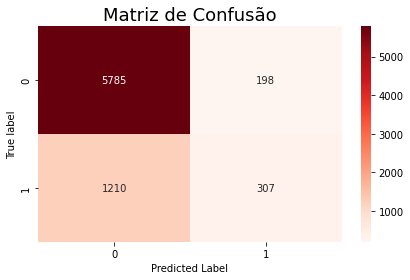

In [63]:
cv = StratifiedKFold(n_splits = 5, shuffle = True)
y_pred = cross_val_predict(LG, X_train, y_train, cv = cv)

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
plt.tight_layout()

In [64]:
cv = StratifiedKFold(n_splits = 5, shuffle = True)
results = cross_val_score(LG, X_train, y_train, cv = 5, scoring = 'accuracy')

def intervalo_ac(results):
    mean = results.mean()
    dv = results.std()
    print('Acurácia média: {:.2f}%'.format(mean*100))
    print('Intervalo de acurácia: [{:.2f}% ~ {:.2f}%]'
           .format((mean - 2*dv)*100, (mean + 2*dv)*100))
intervalo_ac(results)

Acurácia média: 81.16%
Intervalo de acurácia: [79.98% ~ 82.34%]


In [65]:
cv = StratifiedKFold(n_splits = 5, shuffle = True)
results = cross_val_score(LG, X_train, y_train, cv = cv, scoring = 'precision')

def intervalo_prec(results):
    mean = results.mean()
    dv = results.std()
    print('Precisão média: {:.2f}%'.format(mean*100))
    print('Intervalo de Precisão: [{:.2f}% ~ {:.2f}%]'
          .format((mean - 2*dv)*100, (mean + 2*dv)*100))

intervalo_prec(results)

Precisão média: 60.49%
Intervalo de Precisão: [51.84% ~ 69.15%]


In [66]:
cv = StratifiedKFold(n_splits = 5, shuffle = True)
results = cross_val_score(LG, X_train, y_train, cv = cv, scoring = 'recall')

def intervalo_rec(results):
    mean = results.mean()
    dv = results.std()
    print('Recall médio: {:.2f}%'.format(mean*100))
    print('Intervalo de Recall: [{:.2f}% ~ {:.2f}%]'
          .format((mean - 2*dv)*100, (mean + 2*dv)*100))

intervalo_rec(results)

Recall médio: 20.24%
Intervalo de Recall: [17.01% ~ 23.46%]


In [67]:
y_predicted = lg.predict(X_train)
print(classification_report(y_train, y_predicted))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      5983
           1       0.60      0.20      0.30      1517

    accuracy                           0.81      7500
   macro avg       0.71      0.58      0.60      7500
weighted avg       0.78      0.81      0.77      7500



#### 4.3.2 Random Forest <a class="anchor" id="twenty-seventh-bullet"></a>

In [68]:
# Fit Random Forest classifier
RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=8, max_features=6, max_leaf_nodes=None,min_impurity_decrease=0.0,
                            min_impurity_split=None,min_samples_leaf=1, min_samples_split=3,min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
                            oob_score=False, random_state=None, verbose=0,warm_start=False)

rf = RF.fit(X_train, y_train)

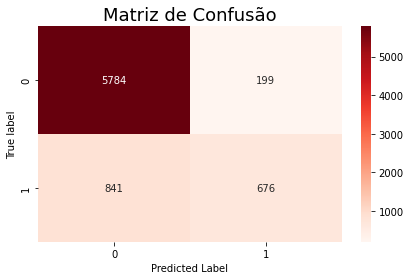

In [69]:
cv = StratifiedKFold(n_splits = 5, shuffle = True)
y_pred = cross_val_predict(RF, X_train, y_train, cv = cv)

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
plt.tight_layout()

In [70]:
cv = StratifiedKFold(n_splits = 5, shuffle = True)

results = cross_val_score(RF, X_train, y_train, cv = 5, scoring = 'accuracy')

def intervalo_ac(results):
    mean = results.mean()
    dv = results.std()
    print('Acurácia média: {:.2f}%'.format(mean*100))
    print('Intervalo de acurácia: [{:.2f}% ~ {:.2f}%]'
           .format((mean - 2*dv)*100, (mean + 2*dv)*100))
intervalo_ac(results)

Acurácia média: 86.00%
Intervalo de acurácia: [84.65% ~ 87.35%]


In [71]:
cv = StratifiedKFold(n_splits = 5, shuffle = True)
results = cross_val_score(RF, X_train, y_train, cv = cv, scoring = 'precision')

def intervalo_prec(results):
    mean = results.mean()
    dv = results.std()
    print('Precisão média: {:.2f}%'.format(mean*100))
    print('Intervalo de Precisão: [{:.2f}% ~ {:.2f}%]'
          .format((mean - 2*dv)*100, (mean + 2*dv)*100))

intervalo_prec(results)

Precisão média: 77.13%
Intervalo de Precisão: [72.11% ~ 82.16%]


In [72]:
cv = StratifiedKFold(n_splits = 5, shuffle = True)
results = cross_val_score(RF, X_train, y_train, cv = cv, scoring = 'recall')

def intervalo_rec(results):
    mean = results.mean()
    dv = results.std()
    print('Recall médio: {:.2f}%'.format(mean*100))
    print('Intervalo de Recall: [{:.2f}% ~ {:.2f}%]'
          .format((mean - 2*dv)*100, (mean + 2*dv)*100))

intervalo_rec(results)

Recall médio: 42.78%
Intervalo de Recall: [39.70% ~ 45.86%]


In [73]:
y_predicted = rf.predict(X_train)
print(classification_report(y_train, y_predicted))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      5983
           1       0.88      0.50      0.64      1517

    accuracy                           0.88      7500
   macro avg       0.88      0.74      0.79      7500
weighted avg       0.88      0.88      0.87      7500



#### 4.3.3 Extreme Gradient Boost Classifier <a class="anchor" id="twenty-eighth-bullet"></a>

In [74]:
# Fit Extreme Gradient Boost Classifier
XGB = XGBClassifier(learning_rate =0.1,
 max_depth=6,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 nthread=4,
 use_label_encoder=False,
 eval_metric="error",
 scale_pos_weight=1.0,
 seed=27)

xgb = XGB.fit(X_train, y_train)

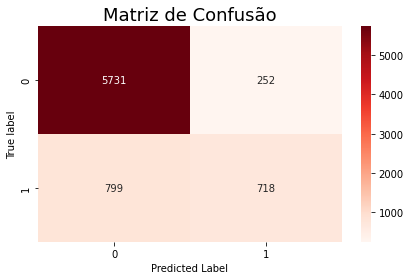

In [75]:
cv = StratifiedKFold(n_splits = 5, shuffle = True)
y_pred = cross_val_predict(XGB, X_train, y_train, cv = cv)

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
plt.tight_layout()

In [76]:
cv = StratifiedKFold(n_splits = 5, shuffle = True)

results = cross_val_score(XGB, X_train, 
                          y_train, cv = 5, scoring = 'accuracy')

def intervalo_ac(results):
    mean = results.mean()
    dv = results.std()
    print('Acurácia média: {:.2f}%'.format(mean*100))
    print('Intervalo de acurácia: [{:.2f}% ~ {:.2f}%]'
           .format((mean - 2*dv)*100, (mean + 2*dv)*100))
    
intervalo_ac(results)

Acurácia média: 86.28%
Intervalo de acurácia: [84.84% ~ 87.72%]


In [77]:
cv = StratifiedKFold(n_splits = 5, shuffle = True)
results = cross_val_score(XGB, X_train, y_train, cv = cv, scoring = 'precision')

def intervalo_prec(results):
    mean = results.mean()
    dv = results.std()
    print('Precisão média: {:.2f}%'.format(mean*100))
    print('Intervalo de Precisão: [{:.2f}% ~ {:.2f}%]'
          .format((mean - 2*dv)*100, (mean + 2*dv)*100))

intervalo_prec(results)

Precisão média: 74.34%
Intervalo de Precisão: [69.69% ~ 78.98%]


In [78]:
cv = StratifiedKFold(n_splits = 5, shuffle = True)
results = cross_val_score(XGB, X_train, y_train, cv = cv, scoring = 'recall')

def intervalo_rec(results):
    mean = results.mean()
    dv = results.std()
    print('Recall médio: {:.2f}%'.format(mean*100))
    print('Intervalo de Recall: [{:.2f}% ~ {:.2f}%]'
          .format((mean - 2*dv)*100, (mean + 2*dv)*100))

intervalo_rec(results)

Recall médio: 46.80%
Intervalo de Recall: [44.27% ~ 49.33%]


In [79]:
y_predicted = xgb.predict(X_train)
print(classification_report(y_train, y_predicted))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      5983
           1       0.90      0.60      0.72      1517

    accuracy                           0.91      7500
   macro avg       0.90      0.79      0.83      7500
weighted avg       0.90      0.91      0.90      7500



#### 4.3.4 Curva ROC <a class="anchor" id="twenty-ninth-bullet"></a>		

In [80]:
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2); 
    return (auc_score, fpr_df, tpr_df)

In [81]:
auc_LG, fpr_LG, tpr_LG = get_auc_scores(y_train, LG.predict(X_train),LG.predict_proba(X_train)[:,1])
auc_RF, fpr_RF, tpr_RF = get_auc_scores(y_train, RF.predict(X_train),RF.predict_proba(X_train)[:,1])
auc_XGB, fpr_XGB, tpr_XGB = get_auc_scores(y_train, XGB.predict(X_train),XGB.predict_proba(X_train)[:,1])

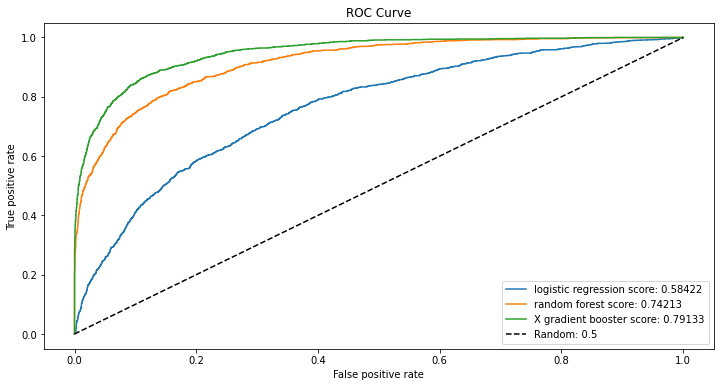

In [82]:
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_LG, tpr_LG, label = 'logistic regression score: ' + str(round(auc_LG, 5)))
plt.plot(fpr_RF, tpr_RF, label = 'random forest score: ' + str(round(auc_RF, 5)))
plt.plot(fpr_XGB, tpr_XGB, label = 'X gradient booster score: ' + str(round(auc_XGB, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

### 4.4 Analisando os modelos  <a class="anchor" id="thirtieth-bullet"></a>		

Para realizar a análise da performance dos modelos, foram observadas as seguintes métricas:

- Resultados das previsões (visualizadas na matriz de confusão);
- Acurácia;
- Precisão;
- Recall;
- Curva ROC.

Considerando que o estudo está sendo realizado com um dataset desbalanceado (a categoria alvo - churn - corresponde a "apenas" 20% dos dados, enquanto os outros 80% dos dados correspondem a outra categoria), torna-se fundamental privilegiar a métrica do recall para analisar as performances dos modelos, mais do que a acurácia e a precisão (sem negligenciar essas outras duas métricas, porém).

O recall é definido como a proporção de previsões corretas da categoria alvo em relação a soma dos verdadeiros positivos com os falsos negativos (casos em que o modelo previu como se não fossem da categoria alvo, mas na realidade eram). Em outras palavras o recall nos dá a medida da proporção de acertos relativos à categoria alvo entregue pelo modelo. 

*Um modelo que conseguisse "entender" apenas os casos da categoria que **não** é o alvo do estudo (conseiderando o citado desbalanceamento do dataset) poderia apresentar acurácia e precisão elevadas, mas não seria de muita serventia, pois o objetivo é entender justamente o comportamento dos casos relacionados à categoria alvo.*

Isto posto, compara-se os valores médios e os intervalos (mínimo e máximo) de recall entregue por cada um dos modelos utilizados nesse estudo:

| Modelo | Recall médio | Intervalo do recall |
| ----------- | ----------- | ----------- | 
| Regressão Logística (LR) | 20,04% | 14,32% ~ 25,76%
| Random Forest (RF) | 44,10% | 39.44% ~ 48.76%
| Extreme Gradient Boost Classifier (XGBC) | 48,52% | 42.26% ~ 54.77%

**A partir da tabela acima observa-se que o modelo Extreme Gradient Boost Classifier (XGBC) é capaz de classificar corretamente até 54,8% dos clientes que deram churn, sendo o modelo mais adequado para esse estudo.** A métrica curva ROC, que mostra a relação entre a taxa de verdadeiros positivos e a taxa de falsos positivos, também traz o modelo XGBC como o mais adequado para o estudo.

### 4.5 Utilizando os dados de teste  <a class="anchor" id="thirty-first-bullet"></a>		

Tendo definido o Extreme Gradient Boost Classifier (XGBC) como melhor modelo de classficação para os clientes que deram churn, aplica-se o modelo treinado agora nos dados de teste.

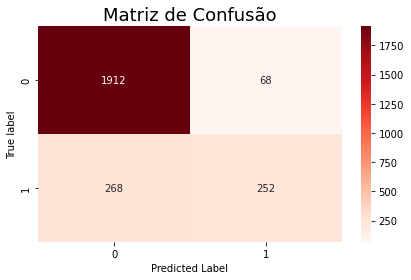

In [83]:
y_pred = XGB.predict(X_test)

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
plt.tight_layout()

In [84]:
print(classification_report(y_test,  XGB.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1980
           1       0.79      0.48      0.60       520

    accuracy                           0.87      2500
   macro avg       0.83      0.73      0.76      2500
weighted avg       0.86      0.87      0.85      2500



### 4.6 Criando dataset com as probabilidades de churn para cada cliente do dataset de teste  <a class="anchor" id="thirty-second-bullet"></a>

In [85]:
df1 = pd.read_csv('/home/user/projetos/churn/data/Churn_Modelling.csv', delimiter=',')
df1['Index original'] = df1.index
df2 = X_test.copy()
df2['Index original'] = df2.index
df2 = df2.drop(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'], axis = 1)
data = df2.merge(df1,on="Index original")
data = data.drop(['RowNumber', 'Surname', 'CreditScore',
       'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary',], axis = 1)
data['Probabilidade de churn (%)'] = pd.Series(XGB.predict_proba(X_test)[:,1]*100)
print(data.shape)
data.head(10)

(2500, 4)


Index original  CustomerId  Exited  Probabilidade de churn (%)
0            9953    15655952       0                    5.156593
1            3850    15775293       0                   13.939108
2            4962    15665088       0                    5.472387
3            3886    15720941       0                    4.503394
4            5437    15733476       0                    4.497797
5            8517    15671800       0                    2.006429
6            2041    15709846       0                   12.220705
7            1989    15622454       0                    2.787693
8            1933    15815560       0                    7.395977
9            9984    15696175       0                    2.793088

In [86]:
fig = px.histogram(data, x='Probabilidade de churn (%)', color="Exited", barmode='group', nbins=5, histnorm="percent")
fig.show()

O dataset "data" contém a probabilidade de churn que o modelo atribuiu a cada cliente do dataset de treino. Seria possível, portanto, reproduzir a mesma metodologia para outros clientes do banco ou até para os mesmos clientes em outro momento e, assim, ter a lista de cliente e os potenciais casos de churn. Dessa forma, o banco pode realizar ações de prevenção do churn de forma dirigida aos clientes identificados com a maior probabilidade de churn. 

O histograma mostra que aproximadamente 42% dos clientes que deram churn estão classificados com probabilidades acima de 60% de risco de churn. Em um cenário com novos dados, clientes nessa faixa de risco poderiam ser alvos de alguma ação de retenção, como, por exemplo a oferta de algum outro produto ou o convite para se tornarem membros ativos do banco (ambas características associadas a um menor risco de churn).


Essa é uma possível utilização de Machine Learning para o benefício de um negócio real. Nesse sentido, o banco poderia se beneficiar de uma menor taxa de churn, consequentemente uma maior taxa retenção de clientes, o que poderia levar ao aumento do faturamento, à melhoria da imagem do banco, à manutenção da carteira de clientes e assim por diante.

## 5. Conclusão  <a class="anchor" id="thirty-third-bullet"></a>

Retomando os objetivos desse estudo:

1. entender, através de uma análise exploratória e da visualização de dados, como um cliente chega a encerrar a sua relação com o banco (dar churn); e
2. criar um modelo para "prever" se um cliente está próximo de pedir cancelamento.

A análise exploratória do dataset revelou algumas cartacterísticas importantes dos clientes que cancelaram o relacionamento com o banco, tornando um pouco mais claro os fatores que aproximam os clientes do churn - clientes localizados na Alemanha, do gênero feminino, que não são membros ativos do banco, com acesso a apenas 1 produto, com idades mais avançadas e com score de crédito baixo estão mais propensos a efetivar o churn.

A aplicação de modelos de Machine Learning fez com que fosse possível associar uma probabilidade de churn a cada cliente de um subconjunto do dataset original. Dessa forma, foi possível associar altas probabilidades de churn (acima de 60% de risco) para 42% dos clientes do dataset de teste que efetivamente cancelaram o relacionamento com o banco. Seria possível tomar medidas com clientes nessa faixa de risco para ajudar a prevenir o churn.

Com isso, pode-se dizer que os objetivos inicialmente desenhados para esse estudo foram alcançados de forma satisfatória, dadas as já mencionadas limitações do dataset e o tempo alocado para a realização do estudo. 

Certamente, melhorias podem ser realizadas para ampliar o entendimento do perfil dos clientes que deram churn e aumentar a eficácia do modelo e, consequentemente, melhorar as previsões de potenciais riscos de churn. Algumas melhorias seriam, por exemplo:

- ampliar a análise exploratória dos dados para identificar se a relação entre duas ou mais variáveis está mais intimamente ligada ao churn;
- aplicação de outros modelos de Machine Learning. Os modelos usados nesse estudo são aqueles que eu tenho mais conhecimento do funcionamento e das métricas de avaliação;
- utilizar métodos de combinação de modelos, como o "VotingClassifier" da biblioteca "sklearn", para melhorar os resultados.

E outras melhorias, com certeza, podem ser aplicadas a esse estudo para melhorar os resultados e torná-lo mais valioso para o negócio em questão. 